In [19]:
import lxml
import glob
import bs4
from lxml import etree 
import numpy as np
from nltk.tokenize import RegexpTokenizer
import nltk
import string
from nltk.corpus import stopwords
#https://www.sketchengine.eu/user-guide/user-manual/corpora/compare-corpora/#toggle-id-1 to compare corpora

###first, we're going to try to parse with etree

In [2]:
#construct paths
#note: these are NOT full text. they link to abstracts. 
pathMAP3K2="/Users/liangrj/Desktop/pubmed_result_MAP3K2.xml"
pathMAP3K3="/Users/liangrj/Desktop/pubmed_result_MAP3K3.xml"
pathMAP3K5="/Users/liangrj/Desktop/pubmed_result_MAP3K5.xml"
pathMAP3K6="/Users/liangrj/Desktop/pubmed_result_MAP3K6.xml"
pathMAP3K15="/Users/liangrj/Desktop/pubmed_result_MAP3K15.xml"


In [3]:
#open all the corpuses. these read as strings initially, so we need to encode to UTF8 into bytes
#could easily do for-loop, but fuck it
with open(pathMAP3K2) as f:
    MAP3K2corp = f.read().encode('UTF-8')
with open(pathMAP3K3) as g:
    MAP3K3corp = g.read().encode('UTF-8')
with open(pathMAP3K5) as h:
    MAP3K5corp = h.read().encode('UTF-8')
with open(pathMAP3K6) as i:
    MAP3K6corp = i.read().encode('UTF-8')
with open(pathMAP3K15) as j:
    MAP3K15corp = j.read().encode('UTF-8')
with open('/Users/liangrj/Desktop/pubmedsample18n0001.xml') as z:
    text = z.read().encode('UTF-8')

In [4]:
#test number of documents in each corpus. I am going to be first using MAP3K5,6,and 15 to determine MAP3K4 function.
#thus, I will only use those for now
et1 = etree.fromstring(MAP3K5corp) #needs to be either UTF8 OR string to be parsed. NOT soup. 
et2 = etree.fromstring(MAP3K6corp)
et3 = etree.fromstring(MAP3K15corp)
articlesMAP3K5_tree=et1.findall('PubmedArticle')
articlesMAP3K6_tree=et2.findall('PubmedArticle')
articlesMAP3K15_tree=et3.findall('PubmedArticle')

In [5]:
def show(e):
    print(etree.tostring(e, xml_declaration=True).decode("utf-8")) 
#try to get the labels of the etree
#string_list_MAP3K5=[]
#show(articlesMAP3K5[0]) #have to do a for loop to make a list. we can create a series of strings from here. 

In [105]:
#articlesMAP3K6 is list of lxml.etree._Element. This parser is interrupted every time there is a tag interruption
count = 0

for article in articlesMAP3K6_tree: #shows all articles in organized format
    count=count+1
    abstract_text_children=""
    abstract_text_path=article.findall('MedlineCitation')[0].findall('Article')[0].findall('Abstract')[0].findall('AbstractText')[0]
    
    title = article.findall('MedlineCitation')[0].findall('Article')[0].findall('ArticleTitle')[0].text
    abstract_text = article.findall('MedlineCitation')[0].findall('Article')[0].findall('Abstract')[0].findall('AbstractText')[0].text
    
    if len(abstract_text_path.getchildren())>0:
        for child in abstract_text_path.getchildren(): 
            abstract_text_children= abstract_text_children + " " + child.text
    print(str(count)+" " +title)
    print(abstract_text + abstract_text_children)

1 Role of germline aberrations affecting 
In approximately 10% of all gastric cancer (GC) cases, a heritable cause is suspected. A subset of these cases have a causative germline  CDH1 CTNNA1 MAP3K6 MYD88
2 Cyclin-dependent kinase 5 regulates MAPK/ERK signaling in the skin of mice.
Cyclin-dependent kinase 5 (CDK5) is a proline-directed serine/threonine kinase that has been shown to play important roles in many tissues except the nervous system. We previously reported that CDK5 showed differential expression in the transcriptome profiles of the skin of alpacas with different hair colors. To understand the functional role of CDK5 in hair color determination, we constructed CDK5-knockdown mice and identified the effect on the mitogen-activated protein kinase (MAPK) pathway in the mouse skin. Quantitative real-time polymerase chain reaction, co-immunoprecipitation, and western blotting were performed to analyze the effects of CDK5-knockdown on the MAPK pathway in mice. The results showed t

# move to beautifulsoup to get rid of the fucking tags. 

In [10]:
#I want to do beautifulsoup in conjunction. Above are corpora as bytes. I want them as soups now.
MAP3K2soup = bs4.BeautifulSoup(MAP3K2corp, 'lxml')
MAP3K3soup = bs4.BeautifulSoup(MAP3K3corp, 'lxml')
MAP3K5soup = bs4.BeautifulSoup(MAP3K5corp, 'lxml')
MAP3K6soup = bs4.BeautifulSoup(MAP3K6corp, 'lxml')
MAP3K15soup = bs4.BeautifulSoup(MAP3K15corp, 'lxml')

In [11]:
MAP3K6soup.articletitle.getText() #just gives first articletitle's title. ignores tags!

'Role of germline aberrations affecting CTNNA1, MAP3K6 and MYD88 in gastric cancer susceptibility.'

In [16]:
soups_MAP3K6soup=MAP3K6soup.find_all('pubmedarticle') #separates into several soups
soups_MAP3K2soup=MAP3K2soup.find_all('pubmedarticle')
soups_MAP3K3soup=MAP3K3soup.find_all('pubmedarticle')
soups_MAP3K5soup=MAP3K5soup.find_all('pubmedarticle')
soups_MAP3K15soup=MAP3K15soup.find_all('pubmedarticle')


In [17]:
#find the text I want from just one soup:  
print(soups_MAP3K6soup[0].articletitle.getText()) #print single abstract's title

#print all of a single abstract's text with a for loop 
abstract_text_list=soups_MAP3K6soup[0].find_all('abstracttext')
type(abstract_text_list)
for abstract_text in abstract_text_list:
    print(abstract_text.getText())

Role of germline aberrations affecting CTNNA1, MAP3K6 and MYD88 in gastric cancer susceptibility.
In approximately 10% of all gastric cancer (GC) cases, a heritable cause is suspected. A subset of these cases have a causative germline CDH1 mutation; however, in most cases the cause remains unknown. Our objective was to assess to what extent these remaining cases may be explained by germline mutations in the novel candidate GC predisposing genes CTNNA1, MAP3K6 or MYD88.
We sequenced a large cohort of unexplained young and/or familial patients with GC (n=286) without a CDH1germline mutation for germline variants affecting CTNNA1, MAP3K6 and MYD88 using a targeted next-generation sequencing approach based on single-molecule molecular inversion probes.
Predicted deleterious germline variants were not encountered in MYD88, but recurrently observed in CTNNA1 (n=2) and MAP3K6 (n=3) in our cohort of patients with GC. In contrast to deleterious variants in CTNNA1, deleterious variants in MAP3K6

In [246]:
soups_MAP3K6soup #raw xml

[<pubmedarticle>
 <medlinecitation owner="NLM" status="Publisher">
 <pmid version="1">29330337</pmid>
 <daterevised>
 <year>2018</year>
 <month>01</month>
 <day>13</day>
 </daterevised>
 <article pubmodel="Print-Electronic">
 <journal>
 <issn issntype="Electronic">1468-6244</issn>
 <journalissue citedmedium="Internet">
 <pubdate>
 <year>2018</year>
 <month>Jan</month>
 <day>12</day>
 </pubdate>
 </journalissue>
 <title>Journal of medical genetics</title>
 <isoabbreviation>J. Med. Genet.</isoabbreviation>
 </journal>
 <articletitle>Role of germline aberrations affecting <i>CTNNA1</i>, <i>MAP3K6</i> and <i>MYD88</i> in gastric cancer susceptibility.</articletitle>
 <elocationid eidtype="pii" validyn="Y">jmedgenet-2017-104962</elocationid>
 <elocationid eidtype="doi" validyn="Y">10.1136/jmedgenet-2017-104962</elocationid>
 <abstract>
 <abstracttext label="BACKGROUND" nlmcategory="BACKGROUND">In approximately 10% of all gastric cancer (GC) cases, a heritable cause is suspected. A subset of

In [31]:
MAP3K6_docstrings=[] #cleaning up the text! 
for soup in soups_MAP3K6soup: #for each soup, get the text you want. 
    articleTitle=soup.articletitle.getText()
    abstract_text_list=soup.find_all('abstracttext')
    string=""
    for abstract_text in abstract_text_list: #looks to see if more than one abstract tag
        string=string + " " + abstract_text.getText()
    MAP3K6_docstrings.append("TITLE: " + articleTitle + " ABSTRACT:" + "".join(string))

In [32]:
MAP3K6_docstrings

['TITLE: Role of germline aberrations affecting CTNNA1, MAP3K6 and MYD88 in gastric cancer susceptibility. ABSTRACT: In approximately 10% of all gastric cancer (GC) cases, a heritable cause is suspected. A subset of these cases have a causative germline CDH1 mutation; however, in most cases the cause remains unknown. Our objective was to assess to what extent these remaining cases may be explained by germline mutations in the novel candidate GC predisposing genes CTNNA1, MAP3K6 or MYD88. We sequenced a large cohort of unexplained young and/or familial patients with GC (n=286) without a CDH1germline mutation for germline variants affecting CTNNA1, MAP3K6 and MYD88 using a targeted next-generation sequencing approach based on single-molecule molecular inversion probes. Predicted deleterious germline variants were not encountered in MYD88, but recurrently observed in CTNNA1 (n=2) and MAP3K6 (n=3) in our cohort of patients with GC. In contrast to deleterious variants in CTNNA1, deleterious

In [33]:
#getting docstrings for everything else
#create a list of soups and a list of docstrings and append them... 
MAP3K2_docstrings=[]
MAP3K3_docstrings=[]
MAP3K5_docstrings=[]
MAP3K6_docstrings=[]
MAP3K15_docstrings=[]
docstring_list=[MAP3K2_docstrings,MAP3K3_docstrings,MAP3K5_docstrings,MAP3K6_docstrings,MAP3K15_docstrings]
soupsList=[soups_MAP3K2soup, soups_MAP3K3soup, soups_MAP3K5soup, soups_MAP3K6soup, soups_MAP3K15soup]

#iterate through souplist and append each docstring of the docstring list

for soups,docstrings in zip(soupsList,docstring_list): #goes through each map3k soup
    for soup in soups: #goes through each soup in the map3ksoup
        articleTitle = soup.articletitle.getText()
        abstract_text_list=soup.find_all('abstracttext')
        string=""
        for abstract_text in abstract_text_list:
            string=string + " " + abstract_text.getText()
        docstrings.append("TITLE: " + articleTitle + " ABSTRACT:" + "".join(string))
        
        
        
        

In [39]:
from nltk.tokenize import RegexpTokenizer
import nltk
import string
from nltk.corpus import stopwords

#processing a single article, (first article of MAP3K6 docstrings)

#let's tokenizes and get rid of punctuation
tokenized_article =nltk.tokenize.regexp_tokenize(MAP3K6_docstrings[0],'\w{2,}') 

#let's get rid of stopwords and make everything lower case. and get rid of numbers too. 
sw = stopwords.words()
tokenized_article = [word.lower() for word in tokenized_article if word.lower() not in sw and word[0] in string.ascii_letters]

#finally, let's stem each word
sb = nltk.stem.SnowballStemmer('english')
stemmed_tokenized_article= [sb.stem(word) for word in tokenized_article]

#join the stemmed words
" ".join(stemmed_tokenized_article) 
    

'titl role germlin aberr affect ctnna1 map3k6 myd88 gastric cancer suscept abstract approxim gastric cancer gc case herit caus suspect subset case causat germlin cdh1 mutat howev case caus remain unknown object assess extent remain case may explain germlin mutat novel candid gc predispos gene ctnna1 map3k6 myd88 sequenc larg cohort unexplain young famili patient gc without cdh1germlin mutat germlin variant affect ctnna1 map3k6 myd88 use target next generat sequenc approach base singl molecul molecular invers probe predict deleteri germlin variant encount myd88 recurr observ ctnna1 map3k6 cohort patient gc contrast deleteri variant ctnna1 deleteri variant map3k6 occur frequent general popul base result map3k6 longer consid gc predisposit gene wherea deleteri ctnna1 variant confirm infrequ caus gc suscept biallel myd88 germlin mutat rare caus gc suscept addit case identifi'

In [40]:
MAP3K6_docstrings[0]

'TITLE: Role of germline aberrations affecting CTNNA1, MAP3K6 and MYD88 in gastric cancer susceptibility. ABSTRACT: In approximately 10% of all gastric cancer (GC) cases, a heritable cause is suspected. A subset of these cases have a causative germline CDH1 mutation; however, in most cases the cause remains unknown. Our objective was to assess to what extent these remaining cases may be explained by germline mutations in the novel candidate GC predisposing genes CTNNA1, MAP3K6 or MYD88. We sequenced a large cohort of unexplained young and/or familial patients with GC (n=286) without a CDH1germline mutation for germline variants affecting CTNNA1, MAP3K6 and MYD88 using a targeted next-generation sequencing approach based on single-molecule molecular inversion probes. Predicted deleterious germline variants were not encountered in MYD88, but recurrently observed in CTNNA1 (n=2) and MAP3K6 (n=3) in our cohort of patients with GC. In contrast to deleterious variants in CTNNA1, deleterious 

In [41]:
#let's try stemming each article in a list of articles now.

sw = stopwords.words()
sb = nltk.stem.SnowballStemmer('english')
tokenized_MAP3K6_docstrings=[]
for docstring in MAP3K6_docstrings:
    tokenized_article = nltk.tokenize.regexp_tokenize(docstring,'\w{2,}') 
    tokenized_article = [word.lower() for word in tokenized_article if word.lower() not in sw and word[0] in string.ascii_letters]
    stemmed_tokenized_article= [sb.stem(word) for word in tokenized_article]
    tokenized_MAP3K6_docstrings.append(" ".join(stemmed_tokenized_article))


tokenized_MAP3K6_docstrings


['titl role germlin aberr affect ctnna1 map3k6 myd88 gastric cancer suscept abstract approxim gastric cancer gc case herit caus suspect subset case causat germlin cdh1 mutat howev case caus remain unknown object assess extent remain case may explain germlin mutat novel candid gc predispos gene ctnna1 map3k6 myd88 sequenc larg cohort unexplain young famili patient gc without cdh1germlin mutat germlin variant affect ctnna1 map3k6 myd88 use target next generat sequenc approach base singl molecul molecular invers probe predict deleteri germlin variant encount myd88 recurr observ ctnna1 map3k6 cohort patient gc contrast deleteri variant ctnna1 deleteri variant map3k6 occur frequent general popul base result map3k6 longer consid gc predisposit gene wherea deleteri ctnna1 variant confirm infrequ caus gc suscept biallel myd88 germlin mutat rare caus gc suscept addit case identifi',
 'titl cyclin depend kinas regul mapk erk signal skin mice abstract cyclin depend kinas cdk5 prolin direct serin 

In [54]:
#let's stem each list of articles now!

from nltk.tokenize import RegexpTokenizer
import nltk
import string
from nltk.corpus import stopwords

tokenized_MAP3K2_docstrings=[]
tokenized_MAP3K3_docstrings=[]
tokenized_MAP3K5_docstrings=[]
tokenized_MAP3K6_docstrings=[]
tokenized_MAP3K15_docstrings=[]
tokenized_docstring_list=[tokenized_MAP3K2_docstrings,tokenized_MAP3K3_docstrings,
                             tokenized_MAP3K5_docstrings,tokenized_MAP3K6_docstrings,
                             tokenized_MAP3K15_docstrings]
#recall previous list of docstrings named docstring_list, which contains ordered MAP3K 
#docstrings
#we're going to make a list called "tokenized_docstring_list". With the following
#for-loop, we will write in all of the processed articles. 

for docstrings,tokenized_list in zip(docstring_list,tokenized_docstring_list):
    for docstring in docstrings:
        tokenized_article = nltk.tokenize.regexp_tokenize(docstring,'\w{2,}') 
        tokenized_article = [word.lower() for word in tokenized_article if word.lower() not in sw and word[0] in string.ascii_letters]
        stemmed_tokenized_article= [sb.stem(word) for word in tokenized_article]
        tokenized_list.append(" ".join(stemmed_tokenized_article))



In [250]:
len(tokenized_MAP3K2_docstrings)

88

In [47]:
tokenized_MAP3K2_docstrings

['titl mekk2 mekk3 suppress hedgehog pathway depend medulloblastoma inhibit gli1 function abstract hedgehog hh pathway play pivot role divers aspect develop postnat physiolog perturb hh signal activ gli1 glioma associ oncogen dedic transcript factor hh pathway high associ sever cancer medulloblastoma basal cell carcinoma dynam precis control gli1 activ thus import ensur proper homeostasi tumorigenesi show mekk2 map3k2 mekk3 map3k3 inhibit gli1 transcript activ oncogen function phosphoryl multipl ser thr site gli1 reduc gli1 protein stabil dna bind abil increas associ gli1 sufu interest mekk2 mekk3 respons fgf2 mediat inhibit hh signal moreov express mekk2 mekk3 inhibit medulloblastoma cell prolifer negat correl hh pathway activ medulloblastoma clinic sampl togeth find reveal novel noncanon gli1 regul provid potenti therapeut target treatment cancer aberr hh pathway activ medulloblastoma',
 'titl optim method use peptid array identif vitro substrat lysin methyltransferas enzym abstract 

In [259]:
#try LDA topic modeling after code (at the end of this script) was inconclusive. 
#topic modeling on a docstring, say MAP3K 5 and 15, find 2 topics
#let's try to find some putative functions of MAP3K4 by looking at MAP3K5, 6, 15 (phylotree)

#MAP4k4 does the following:

#modifies chromatin (HDAC6), gadd45a interaction, increased IL21 (inflammation),
#extracellular acidification, cell migration, t-associated sex reversal,
#TGF-induced phosphorylation and activation of p38 
#regulates testes through controling p38-mediated control of sry
#less IL1A means less MAP3k4 in crohn's disease
#acetylation, JNK phosphorylation, MAPK signaling? look at paper Bogani et al. 
#activates jnk
#wnt-jnk pathway
#SO, mostly p38 and JNK pathways


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

combined_MAP3K_5_6_15=tokenized_MAP3K5_docstrings+tokenized_MAP3K15_docstrings + tokenized_MAP3K6_docstrings
cv1 = CountVectorizer(stop_words = 'english', min_df=.05) #if occurs in 5% of text
cv2 = CountVectorizer(stop_words = 'english', min_df=.02) #if occurs in 2% of text
cv3 = CountVectorizer(stop_words = 'english', min_df=2) #if occurs in at least 2 texts
cv4 = CountVectorizer(stop_words = 'english', min_df=4) #if occurs in at least 3 texts

X1 = cv1.fit_transform(combined_MAP3K_5_6_15)
X2 = cv2.fit_transform(combined_MAP3K_5_6_15)
X3 = cv3.fit_transform(combined_MAP3K_5_6_15)
X4 = cv4.fit_transform(combined_MAP3K_5_6_15)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
                
no_top_words = 50

In [286]:
#3 diff docstrings #n_topics is now n_components

lda_1=LatentDirichletAllocation(n_components=2,  #because when we use 3 topics, MAP3K15 has too few publications
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=0).fit(X1)
lda_2=LatentDirichletAllocation(n_components=3, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=0).fit(X2)
lda_3=LatentDirichletAllocation(n_components=3, 
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=0).fit(X3)
lda_4=LatentDirichletAllocation(n_components=3, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=0).fit(X4)




In [287]:
#documents, words

print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)

(534, 318)
(534, 693)
(534, 2683)
(534, 1515)


In [288]:
display_topics(lda_1, cv1.get_feature_names(), no_top_words) 
#topic 0 is map3k5, topic 2 is ask1 which is also map3k5, and topic 2 is also ask1... 
#basically tells us what ASK1 does

Topic 0:
cell gene activ induc express apoptosi cancer kinas pathway signal death abstract titl studi regul human protein use ask1 respons stress inhibit identifi effect mediat result jnk ros mutat depend involv associ tumor mechan p38 increas treatment develop suggest factor signific genet level target novel caspas apoptot caus analysi relat patient genom addit reveal potenti role line inhibitor map3k5 receptor transcript includ dna famili diseas chang control alter investig molecular time growth base mice function ask assay acid indic speci mapk model rna differenti mitochondri data howev provid decreas protect new phosphoryl import observ reactiv promot mitogen screen remain specif anti oxygen trigger report type generat test sirna high affect exposur tissu demonstr reduc enhanc suppress normal detect molecul sensit recent compar oxid product process cytotox implic determin modul surviv present neuron larg moreov evid format known lead biolog releas select carcinoma knockdown unknow

In [291]:
#finding similarity between topics:
no_top_words = 200 #hypothesis is that there is not enough differentiation between topics. see whether coherence is poor. 
features = cv1.get_feature_names()  #basically IDs 
top_200_by_topic = dict()
for topic_idx, topic in enumerate(lda_1.components_):
    terms = set([features[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    top_200_by_topic[topic_idx] = terms
    
    
s = top_200_by_topic[0]
for i in range(2):
    t = top_200_by_topic[i]
    ins = s.intersection(t) #measure intersection of number 0 to the other 6. 
    print(len(ins))
    
#so there's a high similarity between the topics. that's a good thing--those will be high confidence put. functs.



200
136


In [236]:
display_topics(lda_2, cv2.get_feature_names(), no_top_words)
#topic 0 is ask1 (map3k5) and map3k6, topic 1 is ask1 (MAP3K5),
#topic 2 is map3k5, 

Topic 0:
ask1 gene kinas mice express signal respons protein regul use titl abstract studi identifi activ map3k6 pathway develop mutat stress associ apoptosi cell induc genet type role function target diseas cancer human involv genom analysi signific novel reveal cardiac patient result wild model includ factor variant gastric high case relat
Topic 1:
cell induc apoptosi express ask1 activ cancer regul ros p38 pathway kinas inhibit effect increas signal titl abstract stress protein death level human treatment result studi depend reactiv oxygen jnk speci oxid mediat respons ask trx tumor gastric product gene signific mitochondri mechan use inhibitor mapk suggest apoptot suppress reduc
Topic 2:
activ ask1 kinas signal induc cell protein apoptosi regul pathway jnk phosphoryl inhibit stress mediat p38 abstract titl death mapk depend interact oxid jun termin mechan factor tnf result role suggest express bind respons associ function mitogen cascad caspas complex studi increas neuron effect ap

In [280]:
no_top_words = 200 #hypothesis is that there is not enough differentiation between topics. see whether coherence is poor. 
features = cv2.get_feature_names()  #basically IDs 
top_200_by_topic = dict()
for topic_idx, topic in enumerate(lda_2.components_):
    terms = set([features[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    top_200_by_topic[topic_idx] = terms
    
    
s = top_200_by_topic[0]
for i in range(3):
    t = top_200_by_topic[i]
    ins = s.intersection(t) #measure intersection of number 0 to the other 6. 
    print(len(ins))

200
109
98


In [237]:
display_topics(lda_3,cv3.get_feature_names(),no_top_words)  #this is the one i want. 
#topics 1 and 2 seem same with ask1 involved. 

Topic 0:
gene cancer gastric mutat use map3k6 identifi genet develop cdh1 genom variant autophagi germlin associ case titl patient abstract hdgc express human map3k5 studi gc novel sequenc base caus relat screen candid model respons ctnna1 cell assay analysi test includ new potenti alter variat hereditari syndrom pathway kinas famili diffus
Topic 1:
ask1 activ cell kinas induc apoptosi signal regul protein express pathway stress inhibit p38 jnk titl abstract mediat mice death respons phosphoryl mapk increas studi result effect depend mechan role oxid factor suggest human gene function ros associ tnf inhibitor involv level treatment mitogen signific jun type use cancer tumor
Topic 2:
ask1 kinas protein trx1 signal activ regul phosphoryl interact ask3 stress mapkkk5 complex pathway respons bind cell osmot apoptosi dynam arrestin mpk38 identifi abstract titl spak signalosom osr1 oxid pdk1 mapkkk6 use report beta demonstr mediat electrophil strap associ scaffold trx2 site ask2 hne ask tgf 

In [278]:
no_top_words = 200 #hypothesis is that there is not enough differentiation between topics. see whether coherence is poor. 
features = cv3.get_feature_names()  #basically IDs 
top_200_by_topic = dict()
for topic_idx, topic in enumerate(lda_3.components_):
    terms = set([features[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    top_200_by_topic[topic_idx] = terms
    
    
s = top_200_by_topic[0]
for i in range(3):
    t = top_200_by_topic[i]
    ins = s.intersection(t) #measure intersection of number 0 to the other 6. 
    print(len(ins))
    

200
70
41


In [238]:
display_topics(lda_4,cv4.get_feature_names(),no_top_words) 
#map3k15 is ask3, map3k5 is ask1, map3k6 is topic 2. 

Topic 0:
ask1 activ cell kinas induc apoptosi signal regul protein express pathway stress inhibit abstract titl p38 jnk mediat respons phosphoryl death mapk studi result gene depend mice increas effect mechan role oxid factor human suggest associ use interact function ros inhibitor tnf cancer mitogen level involv treatment jun bind termin
Topic 1:
mice cardiac ask1 express protein hypertrophi map3k5 mpk38 apoptosi heart activ signific pdk1 kinas increas signal diabet regul hiv associ cell type compar induc tissu platelet ventricular titl function defici inhibit posit effect obes remodel impair abstract trx1 left diet wt treatment tgf cardiomyocyt attenu model junction pathway disrupt fat
Topic 2:
gene cancer map3k6 gastric mutat genet identifi cdh1 germlin variant use case hdgc genom patient develop autophagi abstract titl studi associ kinas sequenc caus screen base ctnna1 hereditari candid alter novel respons test syndrom relat variat diffus famili human chang express includ tumor mod

In [284]:
no_top_words = 200 #hypothesis is that there is not enough differentiation between topics. see whether coherence is poor. 
features = cv4.get_feature_names()  #basically IDs 
top_200_by_topic = dict()
for topic_idx, topic in enumerate(lda_4.components_):
    terms = set([features[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    top_200_by_topic[topic_idx] = terms
    
    
s = top_200_by_topic[0]
for i in range(3):
    t = top_200_by_topic[i]
    ins = s.intersection(t) #measure intersection of number 0 to the other 6. 
    print(len(ins))

200
87
71


In [297]:
#let's look at MAP3K2 and MAP3K3 now!

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

combined_MAP3K_2_3= tokenized_MAP3K2_docstrings + tokenized_MAP3K3_docstrings

cv_MAP3K_2_3 = CountVectorizer(stop_words = 'english', min_df=.05) #if occurs in 5% of text

X1_MAP3K_2_3 = cv_MAP3K_2_3.fit_transform(combined_MAP3K_2_3)


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
                
no_top_words = 50

lda_MAP3K_2_3=LatentDirichletAllocation(n_components=2,  #because when we use 3 topics, MAP3K15 has too few publications
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50., 
                                random_state=0).fit(X1_MAP3K_2_3)

no_top_words = 200 #hypothesis is that there is not enough differentiation between topics. see whether coherence is poor. 
features = cv_MAP3K_2_3.get_feature_names()  #basically IDs 
top_200_by_topic = dict()
for topic_idx, topic in enumerate(lda_MAP3K_2_3.components_):
    terms = set([features[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    top_200_by_topic[topic_idx] = terms
    
    
s = top_200_by_topic[0]
for i in range(2):
    t = top_200_by_topic[i]
    ins = s.intersection(t) #measure intersection of number 0 to the other 6. 
    print(len(ins))
    

200
137


In [298]:
ins

{'abstract',
 'acid',
 'activ',
 'alter',
 'analysi',
 'apoptosi',
 'assay',
 'associ',
 'bind',
 'block',
 'breast',
 'cancer',
 'cascad',
 'cell',
 'cellular',
 'clinic',
 'compar',
 'complex',
 'confirm',
 'contribut',
 'control',
 'correl',
 'critic',
 'cytokin',
 'data',
 'decreas',
 'demonstr',
 'depend',
 'determin',
 'develop',
 'differ',
 'differenti',
 'domin',
 'effect',
 'enhanc',
 'erk',
 'express',
 'extracellular',
 'factor',
 'famili',
 'form',
 'format',
 'function',
 'furthermor',
 'gene',
 'growth',
 'high',
 'howev',
 'human',
 'identifi',
 'import',
 'includ',
 'increas',
 'indic',
 'induc',
 'inhibit',
 'inhibitor',
 'interact',
 'investig',
 'involv',
 'jnk',
 'jun',
 'kinas',
 'known',
 'lead',
 'level',
 'map',
 'map3k',
 'map3k2',
 'map3k3',
 'mapk',
 'mechan',
 'mediat',
 'mekk1',
 'mekk2',
 'mekk3',
 'member',
 'mice',
 'migrat',
 'mitogen',
 'model',
 'modul',
 'molecul',
 'molecular',
 'mous',
 'mutant',
 'mutat',
 'negat',
 'novel',
 'observ',
 'overexpre

In [267]:
!pip install matplotlib-venn #graphically looking at this shit. 

    100% |████████████████████████████████| 40kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for matplotlib-venn ... done
  Stored in directory: /Users/liangrj/Library/Caches/pip/wheels/d8/88/2f/e41518cb16e58109e8d14dc5dd7ef8166c82dce86c7c6d6c80
Successfully built matplotlib-venn
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Note... I just realized that I should have decreased my corpus size into ONLY the gene function papers... 

In [94]:
#take a step back, let's make list of list of single stemmed words rather than list
#of single strings. This will allow us to visualize bag of words approach! 

from nltk.tokenize import RegexpTokenizer
import nltk
import string
from nltk.corpus import stopwords

combined_docstring_list=[]
for doc in tokenized_docstring_list:
    combined_docstring_list.append(" ".join(doc))

    
MAP3Kwords_list=[] #MAP3K2, 3, 5, 6, 15. len of list is 5. each item is list of words
for strings in combined_docstring_list:
    MAP3Kwords_list.append(strings.split())


In [276]:
#finding intersections between MAP3K2 and MAP3K3 lists:
print("intersect MAP3K2 and 3: " + 
      str(len(set(MAP3Kwords_list[0]) & set(MAP3Kwords_list[1])))) 
print("intersect MAP3K2 and 3: " + 
      str(len(set(MAP3Kwords_list[0]) & set(MAP3Kwords_list[1]))))


print("intersect MAP3K5 and 6: " + 
      str(len(set(MAP3Kwords_list[2]) & set(MAP3Kwords_list[3])))) 
print("intersect MAP3K5 and 15: " + 
      str(len(set(MAP3Kwords_list[2]) & set(MAP3Kwords_list[4]))))
print("intersect MAP3K6 and 15: " + 
      str(len(set(MAP3Kwords_list[3]) & set(MAP3Kwords_list[4])))) 

#intersect MAP3K5, 6, and 15
print("intersect MAP3K5, 6, and 15: " + 
      str(len(set(MAP3Kwords_list[2]) & set(MAP3Kwords_list[3]) & set(MAP3Kwords_list[4]))))

intersect MAP3K2 and 3: 1289
intersect MAP3K2 and 3: 1289
intersect MAP3K5 and 6: 635
intersect MAP3K5 and 15: 405
intersect MAP3K6 and 15: 210
intersect MAP3K5, 6, and 15: 209


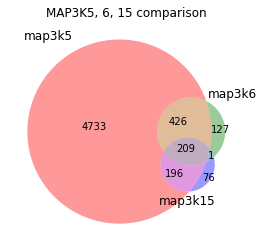

In [271]:
#visualizing intersections is a much easier than I thought!
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
venn3([set(MAP3Kwords_list[2]), set(MAP3Kwords_list[3]), set(MAP3Kwords_list[4])],
      set_labels = ('map3k5', 'map3k6', 'map3k15'))

plt.title("MAP3K5, 6, 15 comparison")
plt.show()

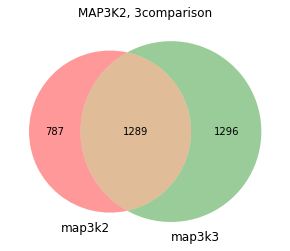

In [277]:
from matplotlib_venn import venn2, venn2_circles
venn2([set(MAP3Kwords_list[0]), set(MAP3Kwords_list[1])],
      set_labels = ('map3k2', 'map3k3'))
plt.title("MAP3K2, 3comparison")
plt.show()

In [145]:
#we had a LOT of intersecting words. how to weight them??? try frequency distributions
#if that doesn't work, you can scroll up and see topic modeling. 
MAP3K2_freq_dist= nltk.FreqDist(MAP3Kwords_list[0])
MAP3K3_freq_dist= nltk.FreqDist(MAP3Kwords_list[1])
MAP3K5_freq_dist= nltk.FreqDist(MAP3Kwords_list[2])
MAP3K6_freq_dist= nltk.FreqDist(MAP3Kwords_list[3])
MAP3K15_freq_dist= nltk.FreqDist(MAP3Kwords_list[4])

MAP3K2_freq_dist.most_common(10)

[('activ', 369),
 ('kinas', 337),
 ('mekk2', 323),
 ('cell', 250),
 ('protein', 155),
 ('express', 138),
 ('regul', 138),
 ('signal', 136),
 ('pathway', 118),
 ('gene', 103)]

In [148]:
total_MAP3K2_words=MAP3K2_freq_dist.N()
for word in MAP3K2_freq_dist:
    MAP3K2_freq_dist[word] /= float(total_MAP3K2_words) # value /= 5 is value = value/5
MAP3K2_freq_dist.most_common(10)

[('activ', 0.02967669293871642),
 ('kinas', 0.02710310439118546),
 ('mekk2', 0.02597715940164066),
 ('cell', 0.020106160527585654),
 ('protein', 0.012465819527103104),
 ('express', 0.01109860061122728),
 ('regul', 0.01109860061122728),
 ('signal', 0.010937751327006594),
 ('pathway', 0.009490107769020428),
 ('gene', 0.008283738137365288)]

In [149]:
#normalize freq dist. not going to think through a for-loop at 2 AM


total_MAP3K3_words=MAP3K3_freq_dist.N()
for word in MAP3K3_freq_dist:
    MAP3K3_freq_dist[word] /= float(total_MAP3K3_words) # value /= 5 is value = value/5

total_MAP3K5_words=MAP3K5_freq_dist.N()
for word in MAP3K5_freq_dist:
    MAP3K5_freq_dist[word] /= float(total_MAP3K5_words) # value /= 5 is value = value/5


total_MAP3K6_words=MAP3K6_freq_dist.N()
for word in MAP3K6_freq_dist:
    MAP3K6_freq_dist[word] /= float(total_MAP3K6_words) # value /= 5 is value = value/5

total_MAP3K15_words=MAP3K15_freq_dist.N()
for word in MAP3K15_freq_dist:
    MAP3K15_freq_dist[word] /= float(total_MAP3K15_words) # value /= 5 is value = value/5



In [248]:
import pandas as pd
pd.DataFrame(MAP3K2_freq_dist.most_common(100), columns=['word', 'freq'])

,word,freq
0,activ,0.029677
1,kinas,0.027103
2,mekk2,0.025977
3,cell,0.020106
4,protein,0.012466
5,express,0.011099
6,regul,0.011099
7,signal,0.010938
8,pathway,0.009490
9,gene,0.008284


In [137]:
pd.DataFrame(MAP3K3_freq_dist.most_common(10), columns=['word', 'freq'])

,word,freq
0,activ,0.025528
1,mekk3,0.023725
2,cell,0.020178
3,kinas,0.019771
4,protein,0.013781
5,express,0.012851
6,gene,0.010002
7,signal,0.009478
8,induc,0.008839
9,pathway,0.007676


In [138]:
pd.DataFrame(MAP3K5_freq_dist.most_common(10), columns=['word', 'freq'])

,word,freq
0,ask1,0.030907
1,activ,0.024812
2,cell,0.022256
3,kinas,0.018154
4,apoptosi,0.016817
5,induc,0.016699
6,signal,0.014772
7,regul,0.012046
8,protein,0.010853
9,express,0.008009


In [139]:
pd.DataFrame(MAP3K6_freq_dist.most_common(10), columns=['word', 'freq'])

,word,freq
0,gene,0.021266
1,map3k6,0.017804
2,cancer,0.016320
3,express,0.013353
4,gastric,0.012859
5,respons,0.011869
6,kinas,0.010880
7,mutat,0.010386
8,mice,0.008408
9,cdh1,0.007913


In [140]:
pd.DataFrame(MAP3K15_freq_dist.most_common(10), columns=['word', 'freq'])

,word,freq
0,kinas,0.022831
1,gene,0.021005
2,protein,0.016438
3,express,0.014612
4,ask3,0.014612
5,pathway,0.013699
6,stress,0.013699
7,human,0.012785
8,cell,0.011872
9,regul,0.011872
